In [10]:
import scipy.io as sio
from scipy.fft import fft
import os,glob
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mat4py import loadmat

In [11]:
import scipy.io as sio
from mat4py import loadmat
import numpy as np

def wfft_hz(filename, Hz_Lthr, Hz_Hthr):
    '"Lthr: lower threshold; Hthr: high threshold"'
    data = loadmat(filename)
    fft_data = fft(data['data'])
    NFFT = math.floor(len(data['data'])/2)+1
    fft_data = abs(fft_data[1:NFFT])
    f = data['Fs']/2 * np.linspace(0, 1, NFFT)
    idx = [i for i, e in enumerate(f) if e>= Hz_Lthr and e <= Hz_Hthr ] 
    X=f[idx]
    y=fft_data[idx]
    return X, y

def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

def remove_trends_from_signal(X, y):
    Y = [ round(item, 6) for elem in y for item in elem ]
    m, b = np.polyfit(X, y, 1)
    Y = Y-(m*X)
    return Y

def find_top_peaks(file, Hz_Lthr, Hz_Hthr, mu, sigma, number_of_peak):
    [X, y] =  wfft_hz(file,Hz_Lthr, Hz_Hthr)
    Y = remove_trends_from_signal(X,y)
    peaks, _ = find_peaks(Y, height=0)
    gaussoan_weight=gaussian(np.array(X), mu, sigma)
    y_with_weight = Y*gaussoan_weight
    top_peaks = heapq.nlargest(number_of_peak, y_with_weight[peaks])
    top_peaks_idx = [index[0] for index in [np.where(y_with_weight == peak)[0] for peak in top_peaks]]
    top_peaks_idx.sort()
    return X, Y, top_peaks_idx

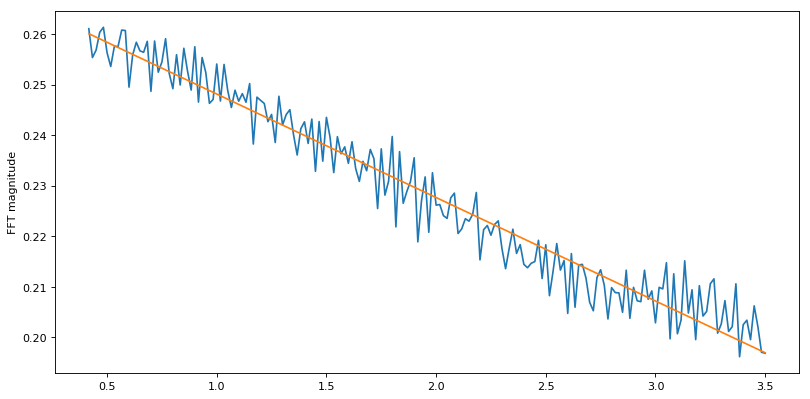

In [12]:
Hz_Lthr, Hz_Hthr =0.4, 3.5 
file = '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_R_A_1.mat'
[X,y] =  wfft_hz(file,Hz_Lthr, Hz_Hthr)

plt.figure(figsize=(12, 6), dpi=80)
plt.plot(X, y)
m, b = np.polyfit(X, y, 1)
plt.plot(X, m*X + b)
plt.ylabel('FFT magnitude')
plt.show()

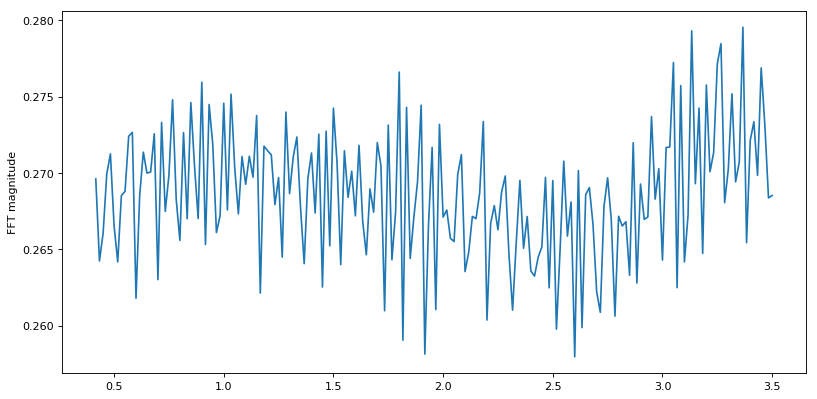

In [13]:
#remove trends from data
file = '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_R_A_1.mat'

[X,y] =  wfft_hz(file,Hz_Lthr, Hz_Hthr)
plt.figure(figsize=(12, 6), dpi=80)
Y = remove_trends_from_signal(X, y)
plt.plot(X, Y)
plt.ylabel('FFT magnitude')
#plt.text(6, 0.3, "Min:"+str(min(y))+"  Max:"+str(max(y)), fontsize=16, bbox=dict(facecolor='red', alpha=0.5))
plt.show()

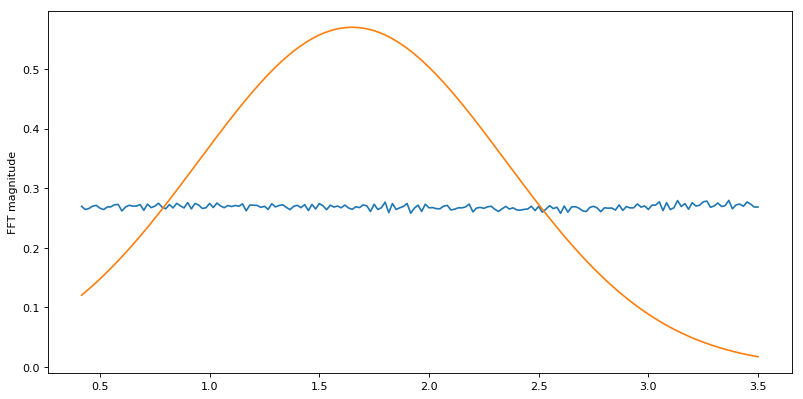

In [14]:
mu, sig = (1.65, 0.7)
gaussoan_weight=gaussian(np.array(X), mu, sig)

plt.figure(figsize=(12, 6), dpi=80)
plt.plot(X, Y)
plt.plot(X, gaussoan_weight)
plt.ylabel('FFT magnitude')
plt.show()

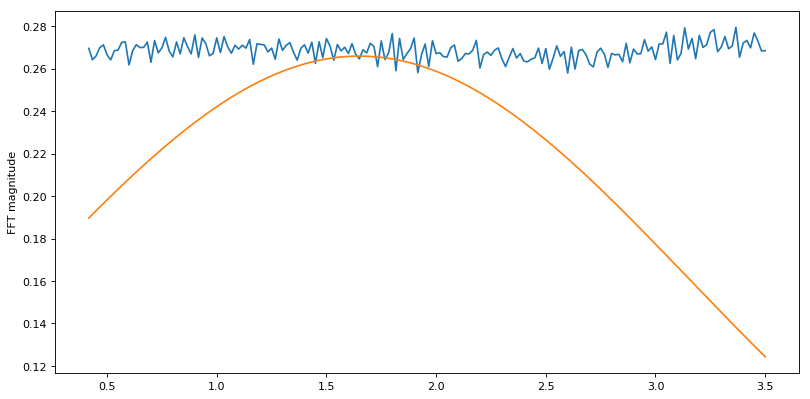

In [15]:
mu, sig = (1.65, 1.5)
gaussoan_weight=gaussian(np.array(X), mu, sig)

plt.figure(figsize=(12, 6), dpi=80)
plt.plot(X, Y)
plt.plot(X, gaussoan_weight)
plt.ylabel('FFT magnitude')
plt.show()

In [16]:
fft_with_weight = Y*gaussoan_weight

In [17]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(Y, height=0)
len(peaks)

65

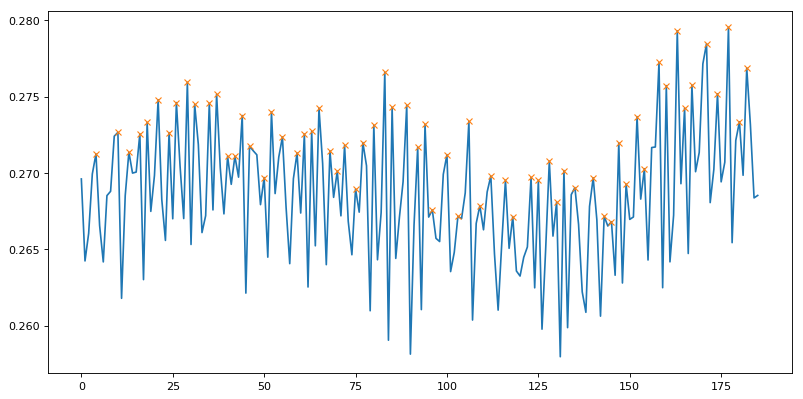

In [18]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(Y)

plt.plot(peaks, Y[peaks], "x")
plt.show()

In [19]:
import heapq
number_of_elements = 10
top_ten_peaks = heapq.nlargest(number_of_elements, fft_with_weight[peaks])

In [20]:
top_ten_peaks_index = [index[0] for index in [np.where(fft_with_weight == peak)[0] for peak in top_ten_peaks]]
top_ten_peaks_index.sort()
top_ten_peaks_index

[63, 65, 68, 70, 72, 77, 80, 83, 85, 89]

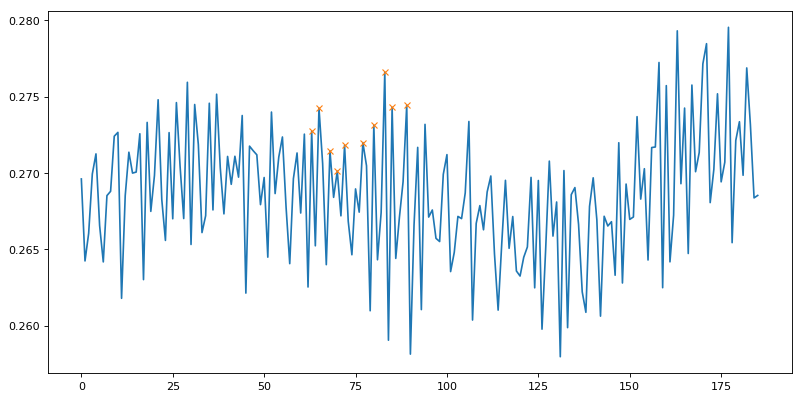

In [21]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(Y)
plt.plot(top_ten_peaks_index, Y[top_ten_peaks_index], "x")
plt.show()

In [22]:

sorted(top_ten_peaks_index)

[63, 65, 68, 70, 72, 77, 80, 83, 85, 89]

In [23]:
[X[peak]*60 for peak in top_ten_peaks_index]

[88.0, 90.0, 93.0, 95.0, 97.0, 102.0, 105.0, 108.0, 110.0, 114.00000000000001]

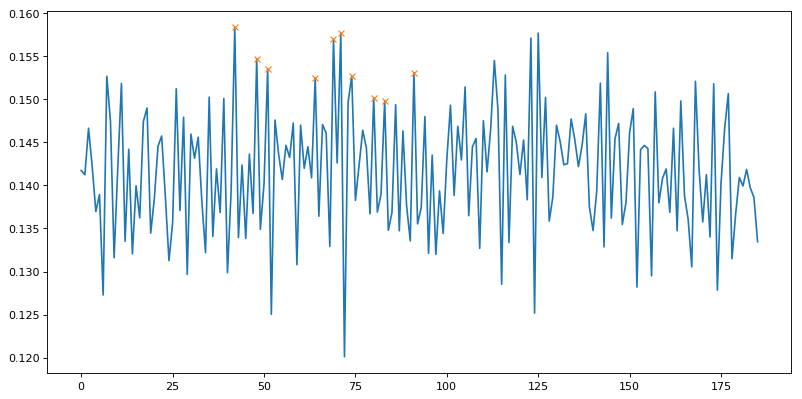

In [24]:
file = '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_L_A_1.mat'
[X,y] =  wfft_hz(file,Hz_Lthr, Hz_Hthr)
# remove the trend
Y = remove_trends_from_signal(X,y)
peaks, _ = find_peaks(Y, height=0)
gaussoan_weight=gaussian(np.array(X), mu, sig)

fft_with_weight = Y*gaussoan_weight
top_ten_peaks = heapq.nlargest(number_of_elements, fft_with_weight[peaks])

top_ten_peaks_index = [index[0] for index in [np.where(fft_with_weight == peak)[0] for peak in top_ten_peaks]]
top_ten_peaks_index.sort()


plt.figure(figsize=(12, 6), dpi=80)
plt.plot(Y)
plt.plot(top_ten_peaks_index, Y[top_ten_peaks_index], "x")
plt.show()


In [25]:
[X[peak]*60 for peak in top_ten_peaks_index]

[67.0,
 73.0,
 76.00000000000001,
 89.0,
 94.0,
 95.99999999999999,
 99.0,
 105.0,
 108.0,
 116.0]

In [26]:
X, Y, top_peaks = find_top_peaks('../datasets/Age_A/Age_A_Male/Sub 36/36Neck_L_A_1.mat', 0.4, 3.5, 1.65, 0.7, 5)

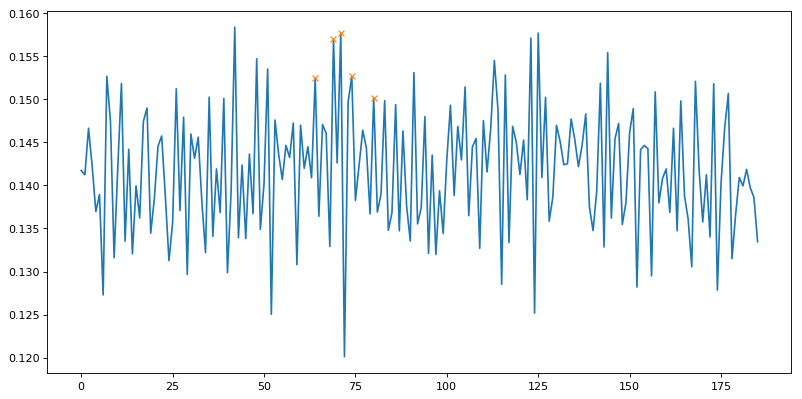

In [27]:
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(Y)
plt.plot(top_peaks, Y[top_peaks], "x")
plt.show()

In [28]:
[round(X[peak]*60,0) for peak in top_peaks]

[89.0, 94.0, 96.0, 99.0, 105.0]

In [29]:
Hz_Lthr, Hz_Hthr, mu, gamma, no_peaks= 0.4, 3.5, 1.65, 0.7, 5

files_36 = ['../datasets/Age_A/Age_A_Male/Sub 36/36Neck_L_A_1.mat',
        '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_L_A_2.mat',
        '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_L_A_3.mat',
        '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_R_A_1.mat',
        '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_R_A_2.mat',
        '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_R_A_3.mat']


all_peaks_hr = []

for  file in files_36:
    X, Y, top_peaks = find_top_peaks(file, Hz_Lthr, Hz_Hthr, mu, gamma, no_peaks)
    top_peaks_hr = [round(X[peak]*60) for peak in top_peaks]
    print(top_peaks_hr)
    

[89.0, 94.0, 96.0, 99.0, 105.0]
[92.0, 98.0, 100.0, 103.0, 108.0]
[93.0, 95.0, 97.0, 100.0, 105.0]
[95.0, 97.0, 102.0, 105.0, 108.0]
[80.0, 87.0, 94.0, 105.0, 113.0]
[93.0, 96.0, 99.0, 101.0, 104.0]


In [30]:
Hz_Lthr, Hz_Hthr, mu, gamma, no_peaks= 0.4, 3.5, 1.65, 1.5, 5

files_36 = ['../datasets/Age_A/Age_A_Male/Sub 36/36Neck_L_A_1.mat',
        '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_L_A_2.mat',
        '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_L_A_3.mat',
        '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_R_A_1.mat',
        '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_R_A_2.mat',
        '../datasets/Age_A/Age_A_Male/Sub 36/36Neck_R_A_3.mat']


all_peaks = []

for  file in files_36:
    X, Y, top_peaks = find_top_peaks(file, Hz_Lthr, Hz_Hthr, mu, gamma, no_peaks)
    top_peaks_hr = [round(X[peak]*60) for peak in top_peaks]
    all_peaks.append(top_peaks_hr)
    print(top_peaks_hr)

[89.0, 94.0, 96.0, 99.0, 116.0]
[68.0, 92.0, 100.0, 103.0, 124.0]
[93.0, 95.0, 97.0, 100.0, 105.0]
[90.0, 102.0, 105.0, 108.0, 110.0]
[74.0, 80.0, 87.0, 113.0, 128.0]
[72.0, 93.0, 99.0, 101.0, 118.0]


In [31]:
!pip3 install kmeans1d

You should consider upgrading via the '/Users/ayub/anaconda3/bin/python -m pip install --upgrade pip' command.


In [32]:
flat_list = [item for sublist in all_peaks for item in sublist]
flat_list

[89.0,
 94.0,
 96.0,
 99.0,
 116.0,
 68.0,
 92.0,
 100.0,
 103.0,
 124.0,
 93.0,
 95.0,
 97.0,
 100.0,
 105.0,
 90.0,
 102.0,
 105.0,
 108.0,
 110.0,
 74.0,
 80.0,
 87.0,
 113.0,
 128.0,
 72.0,
 93.0,
 99.0,
 101.0,
 118.0]

In [33]:
import kmeans1d

k = 3
clusters, centroids = kmeans1d.cluster(flat_list, k)

print(clusters)   
print(centroids)

[1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 2, 0, 1, 1, 1, 2]
[73.5, 96.8421052631579, 116.71428571428571]


In [34]:
from collections import Counter
counter =  Counter(clusters)
counter

Counter({1: 19, 2: 7, 0: 4})

In [35]:
def keywithmaxval(d):
    v=list(d.values())
    k=list(d.keys())
    max_v = max(v) 
    return (k[v.index(max_v)], max_v)

In [36]:
max_cluster =  keywithmaxval(counter)
max_cluster

(1, 19)

In [37]:
centroids[max_cluster[0]]

96.8421052631579